# Functions

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def univariate_analysis_numerical(df, column_name):
    # Check if the column is numerical
    if df[column_name].dtype in ['int64', 'float64']:
        # Plot histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[column_name], kde=True)
        plt.title('Histogram')

        # Plot boxplot
        plt.subplot(1, 3, 2)
        plt.boxplot(df[column_name],patch_artist=True, notch=True)
        # Detect those values that are extreme outliers, more than 3 times the IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        # Add one to the column named ext_univar_outlier
        outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
        df.loc[outliers, 'ext_univar_outlier'] += 1

        # check if any outliers are over the upper bound
        if df[column_name].max() > upper_bound:
            plt.axhline(y=upper_bound, color='r', linestyle='--', linewidth=1)
        if df[column_name].min() < lower_bound:
            plt.axhline(y=lower_bound, color='r', linestyle='--', linewidth=1)


        plt.show()
        return df

    else:
        print("The specified column is not numerical.")
        return df
    
def univariate_analysis_categorical(df, column_name):
    # Check if the column is categorical
    if df[column_name].dtype == 'object':
        # Plot bar chart
        if column_name == 'differentiate':
            # change the names
            df[column_name] = df[column_name].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                                       "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
            # plot the graph following the order
            plt.figure()
            sns.countplot(x=df[column_name], order=['well diff', 'mod diff', 'poor diff', 'undiff'])
            plt.title('Bar Chart')

        elif column_name == '6th Stage':
            plt.figure()
            sns.countplot(x=df[column_name], order=['IIA','IIB','IIIA','IIIB','IIIC'])
            plt.title('Bar Chart')
            
        else:
            plt.figure()
            sns.countplot(x=df[column_name])
            plt.title('Bar Chart')
       

    else:
        print("The specified column is not categorical.")

def bivariate_numerical(df):
    target_variable = 'Status'
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns
    
    sns.pairplot(df[num_vars], hue='Status')
    
    df_melted = df.melt(id_vars=target_variable, value_vars=num_vars)

    # Create a box plot categorized by the categorical variable on the y-axis
    sns.catplot(x='variable', y='value', hue=target_variable, kind='box', data=df_melted, height=6, aspect=2)

    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

def bivariate_categorical(df):
    target_variable = 'Status'
    cat_vars = df.select_dtypes(include=['object']).columns
    # drop grade and status
    cat_vars = cat_vars.drop('Grade')
    cat_vars = cat_vars.drop('Status')
    
    for i,cat_var in enumerate(cat_vars):
        # Calculate the row and column number for the subplot knowing there are 3 columns and 3 rows
        row = i//3
        col = i%3
        if cat_var == '6th Stage':
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = ['IIA','IIB','IIIA','IIIB','IIIC']
        else:
            if cat_var == 'differentiate':
                df[cat_var] = df[cat_var].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                               "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
        
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = pd.Series(df[cat_var].unique())
        
        fig, ax = join_barcharts(cat_var_positive, cat_var_negative, classes, title=cat_var, xlabel=cat_var, ylabel='Proportion', legend_labels=('Alive', 'Dead'))

def join_barcharts(data1, data2, labels, title='', xlabel='', ylabel='', legend_labels=('Positive', 'Negative')):
    
    n = len(labels)
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(nrows=3, ncols=3)
    index = np.arange(n)
    rects1 = ax.bar(index, data1, width, label=legend_labels[0])
    rects2 = ax.bar(index + width, data2, width, label=legend_labels[1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(index + width / 2)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()
    


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def univariate_analysis_numerical(df, column_name):
    # Check if the column is numerical
    if df[column_name].dtype in ['int64', 'float64']:
        # Plot histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[column_name], kde=True)
        plt.title('Histogram')

        # Plot boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column_name])
        # Detect those values that are extreme outliers, more than 3 times the IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        # Add one to the column named ext_univar_outlier
        if 'ext_univar_outlier' not in df.columns:
            df['ext_univar_outlier'] = 0
        outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
        df.loc[outliers, 'ext_univar_outlier'] += 1

        # check if any outliers are over the upper bound
        if df[column_name].max() > upper_bound:
            plt.axhline(y=upper_bound, color='r', linestyle='--', linewidth=1)
        if df[column_name].min() < lower_bound:
            plt.axhline(y=lower_bound, color='r', linestyle='--', linewidth=1)

        plt.title('Box Plot')
        plt.subplot(1, 3, 3)
        sns.boxplot(df[column_name],patch_artist=True, notch=True)
        plt.title('Box Plot')
        plt.show()
        return df

    else:
        print("The specified column is not numerical.")
        return df
    
def univariate_analysis_categorical(df, column_name):
    # Check if the column is categorical
    if df[column_name].dtype == 'object':
        # Plot bar chart
        if column_name == 'differentiate':
            # change the names
            df[column_name] = df[column_name].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                                       "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
            # plot the graph following the order
            plt.figure()
            sns.countplot(x=df[column_name], order=['well diff', 'mod diff', 'poor diff', 'undiff'])
            plt.title('Bar Chart')
        elif column_name == '6th Stage':
            plt.figure()
            sns.countplot(x=df[column_name], order=['IIA','IIB','IIIA','IIIB','IIIC'])
            plt.title('Bar Chart')
        else:
            plt.figure()
            sns.countplot(x=df[column_name])
            plt.title('Bar Chart')
        plt.show()
    else:
        print("The specified column is not categorical.")

def bivariate_numerical(df):
    target_variable = 'Status'
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns
    
    sns.pairplot(df, hue='Status')
    plt.show()

def bivariate_categorical(df):
    target_variable = 'Status'
    cat_vars = df.select_dtypes(include=['object']).columns
    # drop grade and status
    cat_vars = cat_vars.drop('Grade')
    cat_vars = cat_vars.drop('Status')
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    for i, cat_var in enumerate(cat_vars):
        # Calculate the row and column number for the subplot knowing there are 3 columns and 3 rows
        row = i // 3
        col = i % 3
        if cat_var == '6th Stage':
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = ['IIA','IIB','IIIA','IIIB','IIIC']
        else:
            if cat_var == 'differentiate':
                df[cat_var] = df[cat_var].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                               "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
        
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = pd.Series(df[cat_var].unique())

        width = 0.35
        index = np.arange(len(classes))
        axes[row, col].bar(index, cat_var_positive, width, label='Alive')
        axes[row, col].bar(index + width, cat_var_negative, width, label='Dead')

        axes[row, col].set_xlabel(cat_var)
        axes[row, col].set_ylabel('Proportion')
        axes[row, col].set_title(cat_var)
        axes[row, col].set_xticks(index + width / 2)
        axes[row, col].set_xticklabels(classes)
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()



In [150]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Breast_Cancer.csv")
df_p = pd.read_csv("Breast_Cancer_Preprocessed_Cat.csv")


In [151]:
bivariate_numerical(df_p)
bivariate_categorical(df_p)

KeyboardInterrupt: 

# Importing the Dataset

In [2]:
import pandas as pd
import os
#parent_directory = os.path.dirname(os.getcwd())
#os.chdir(parent_directory)
print(os.getcwd())
#EDA on numerical variables
# Load the dataset

df_breast_cancer = pd.read_csv('data/Breast_Cancer.csv', sep=",", header=0)
'''df_breast_cancer["ext_univar_outlier"] = 0

for column in df_breast_cancer.columns:
    if column not in ['ext_univar_outlier']:
        #df_breast_cancer = univariate_analysis_numerical(df_breast_cancer, column)
        univariate_analysis_categorical(df_breast_cancer, column)
df_breast_cancer.to_csv('data/Breast_Cancer_outliers.csv', index=False)'''
#bivariate_numerical(df_breast_cancer[['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive','Survival Months','Status']])
bivariate_categorical(df_breast_cancer)


c:\Users\Admin\Desktop\MASTER\Q2\ML\course project


FileNotFoundError: [Errno 2] No such file or directory: 'data/Breast_Cancer.csv'

Proceso Numericas a Categoricas

In [ ]:
import pandas as pd

# Load the preprocessed dataset
df_breast_cancer = pd.read_csv('Breast_Cancer_Preprocessed.csv')

# Reverse stage mappings
stage_reverse_mapping = {
    0: 'IIA',
    1: 'IIB',
    2: 'IIIA',
    3: 'IIIB',
    4: 'IIIC'
}
df_breast_cancer['6th Stage'] = df_breast_cancer['6th Stage'].map(stage_reverse_mapping)

t_stage_reverse_mapping = {
    0: 'T0',
    1: 'T1',
    2: 'T2',
    3: 'T3',
    4: 'T4'
}
df_breast_cancer['T Stage'] = df_breast_cancer['T Stage'].map(t_stage_reverse_mapping)

n_stage_reverse_mapping = {
    0: 'N0',
    1: 'N1',
    2: 'N2',
    3: 'N3',
    4: 'N4'
}
df_breast_cancer['N Stage'] = df_breast_cancer['N Stage'].map(n_stage_reverse_mapping)

a_stage_reverse_mapping = {
    0: 'Regional',
    1: 'Distant',
}
df_breast_cancer['A Stage'] = df_breast_cancer['A Stage'].map(a_stage_reverse_mapping)

# Reverse differentiation mapping
diff_reverse_mapping = {
    0: 'Well differentiated',
    1: 'Moderately differentiated',
    2: 'Poorly differentiated',
    3: 'Undifferentiated'
}
df_breast_cancer['differentiate'] = df_breast_cancer['differentiate'].map(diff_reverse_mapping)

# Reverse status mappings
es_status_reverse_mapping = {
    0: 'Negative',
    1: 'Positive'
}
df_breast_cancer['Estrogen Status'] = df_breast_cancer['Estrogen Status'].map(es_status_reverse_mapping)
df_breast_cancer['Progesterone Status'] = df_breast_cancer['Progesterone Status'].map(es_status_reverse_mapping)

status_reverse_mapping = {
    1: 'Alive',
    0: 'Dead'
}
df_breast_cancer['Status'] = df_breast_cancer['Status'].map(status_reverse_mapping)

# Display the first few rows of the DataFrame to verify the reverse mappings
print(df_breast_cancer.head())


   Age   Race Marital Status T Stage N Stage 6th Stage  \
0   48  Other        Single       T2      N1       IIB   
1   47  White        Married      T2      N1       IIB   
2   65  White        Married      T1      N1       IIA   
3   49  Black      Separated      T1      N3      IIIC   
4   49  White       Divorced      T2      N1       IIB   

               differentiate   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated  Regional          23        Positive   
1      Poorly differentiated  Regional          39        Positive   
2        Well differentiated  Regional           8        Positive   
3        Well differentiated   Distant          12        Positive   
4  Moderately differentiated  Regional          38        Positive   

  Progesterone Status  Regional Node Examined  Regional Node Positive  \
0            Positive                       9                       1   
1            Positive                      29                       1   
2          

In [ ]:
df_breast_cancer.to_csv('Breast_Cancer_Preprocessed_Cat.csv', index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5436\1467479438.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.columns[i], data=df, ax=ax, palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5436\1467479438.py:37: UserWarning: 
The palette list has fewer values (2) than needed (40) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df.columns[i], data=df, ax=ax, palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5436\1467479438.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.columns[i], data=df, ax=ax, palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5436\1467479438.py:37: UserWarning: 
The palette list has fewer va

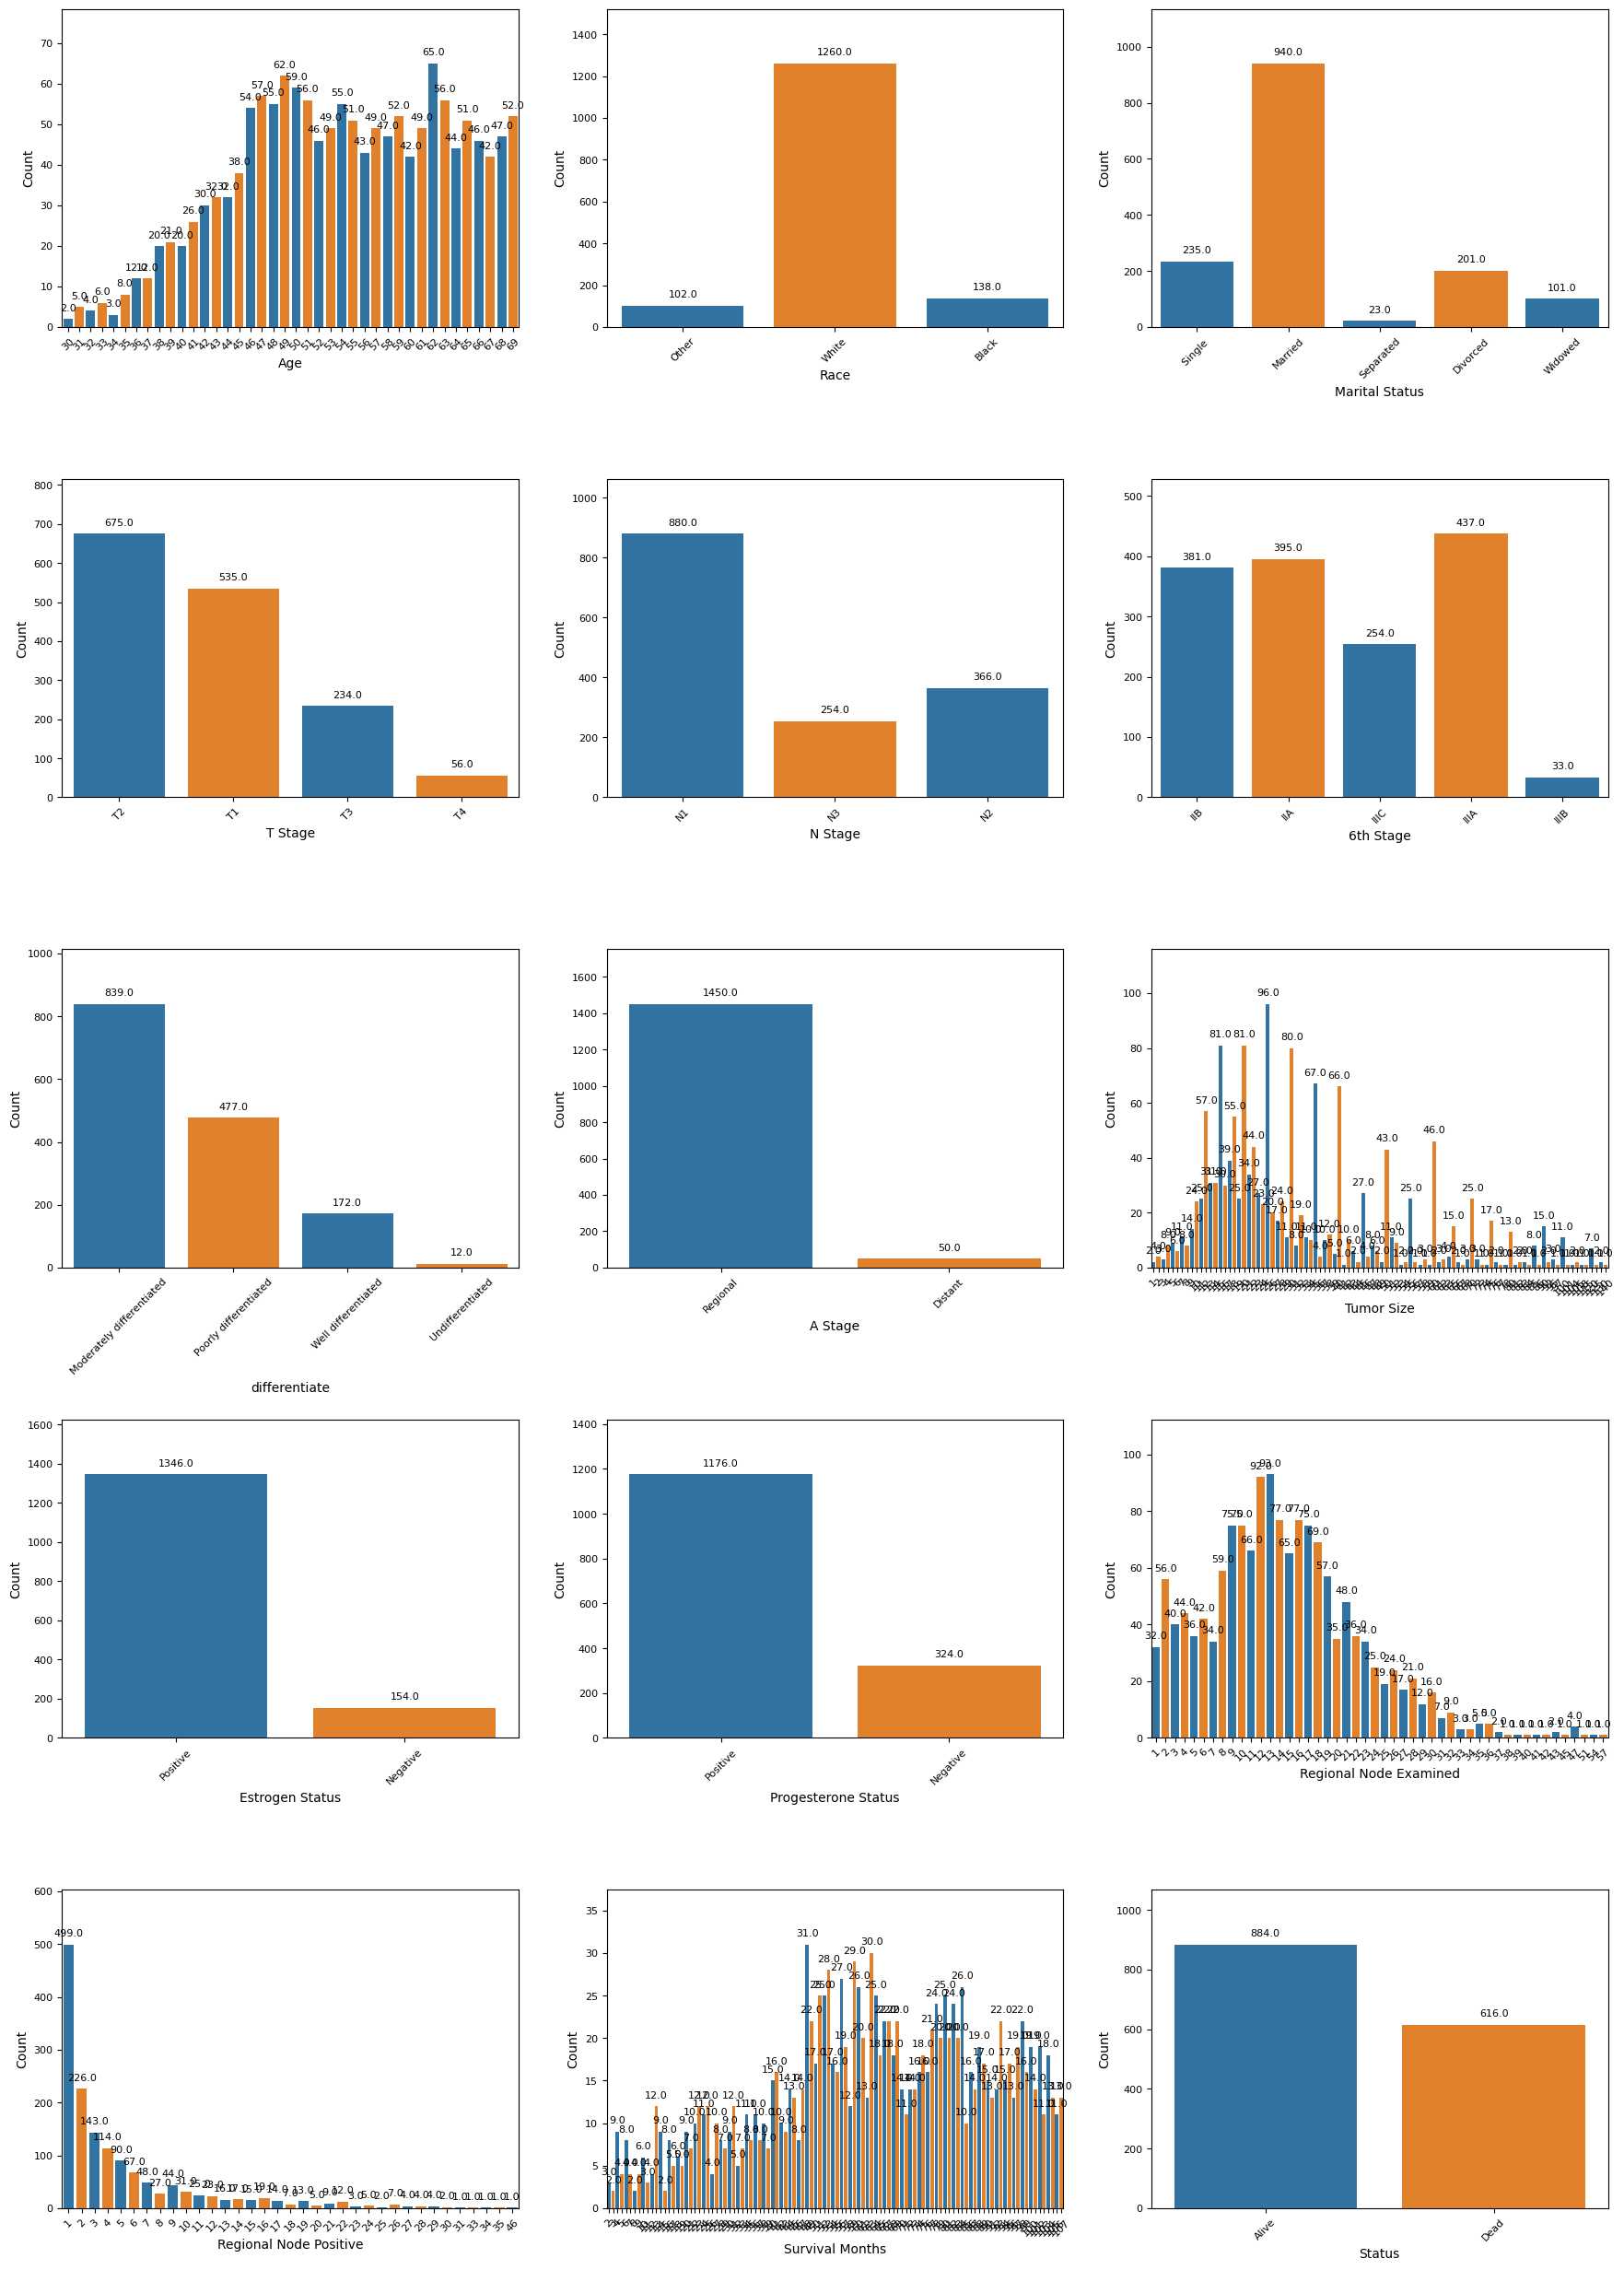

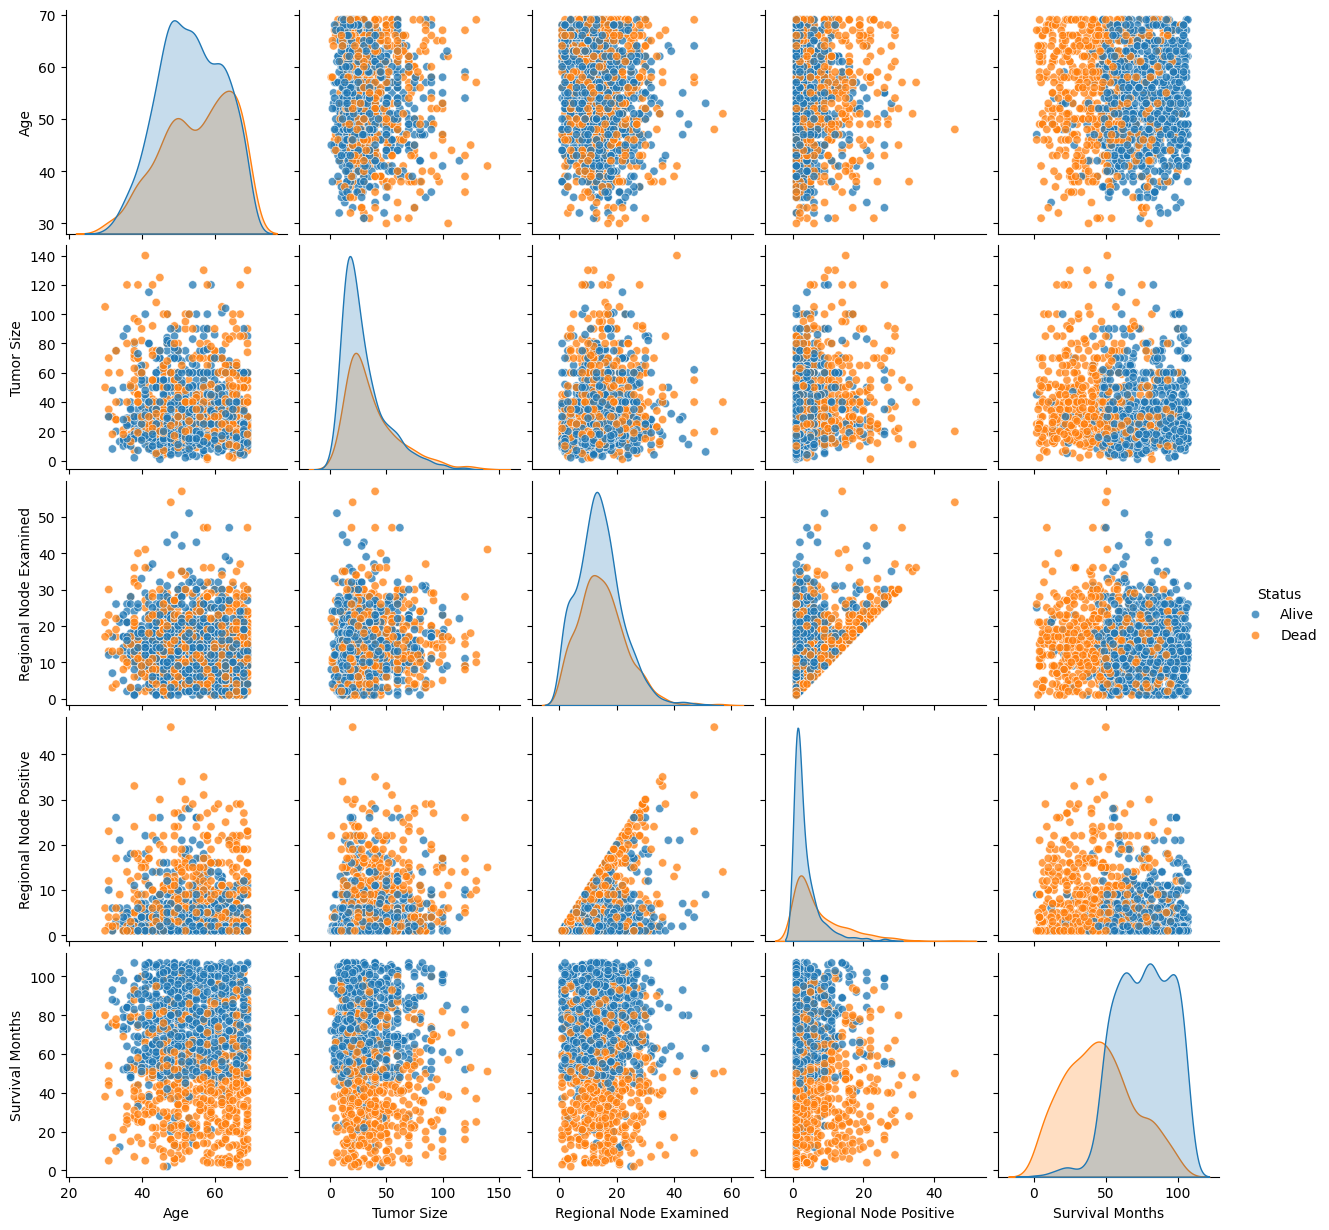

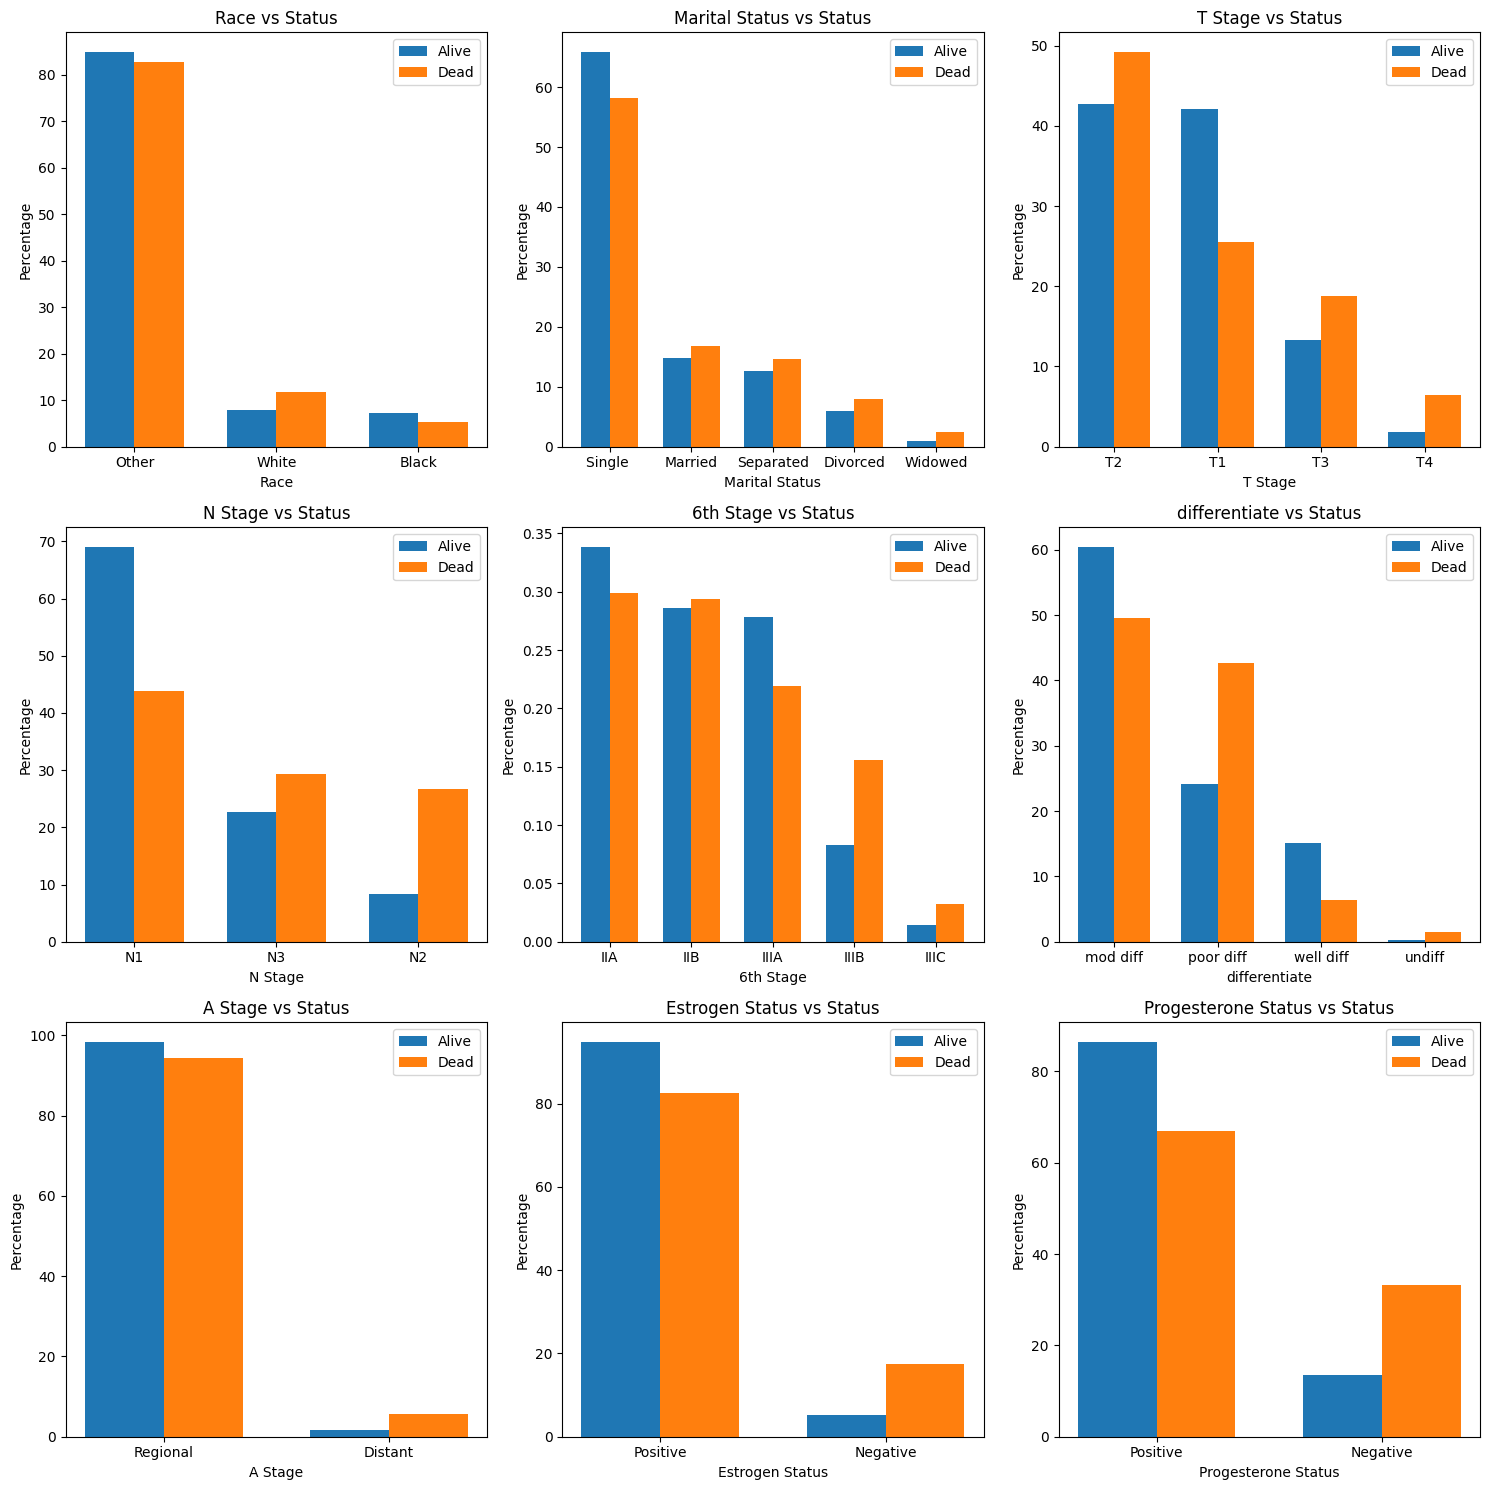

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV into a DataFrame
breast_cancer = pd.read_csv("Breast_Cancer_Preprocessed_Cat.csv")

# Function to split categorical and numerical columns
def split_cat_num_columns(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    return cat_cols, num_cols

# 1. Description of Final Dataset
def plot_dataframe(df):
    cat_cols, num_cols = split_cat_num_columns(df)
    
    # Define custom color palette
    colors = ['#1f77b4', '#ff7f0e']  # Blue and orange

    # Create figure and axes
    num_plots = len(df.columns)
    num_rows = (num_plots - 1) // 3 + 1
    num_cols = min(num_plots, 3)  # Adjust number of columns to minimum of 3 or actual number of columns
    fig, axes = plt.subplots(5, 3, figsize=(18, 5*5))

    # Set axis labels font properties
    font_props = {'fontsize': 10}

    # Plot each variable
    for i, col in enumerate(df.columns):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        if col < len(df.columns):
            if col < len(cat_cols):
                sns.countplot(x=df.columns[i], data=df, ax=ax, palette=colors)
                ax.set_xlabel(df.columns[i], fontdict=font_props)
                ax.set_ylabel('Count', fontdict=font_props)

                # Add numbers on top of the bars
                for p in ax.patches:
                    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)
            else:
                if df.columns[i] in num_cols:
                    sns.histplot(x=df.columns[i], data=df, ax=ax, color=colors[0], kde=True, stat="density")
                    kde_color = colors[1]  # Orange color for the kernel density plot
                    sns.kdeplot(x=df.columns[i], data=df, ax=ax, color=kde_color, lw=1.5)
                    ax.set_xlabel(df.columns[i], fontdict=font_props)
                    ax.set_ylabel('Density', fontdict=font_props)
                else:
                    ax.axis('off')  # If the column is categorical and not numerical, omit the plot

            # Rotate x-axis labels
            ax.tick_params(axis='x', labelrotation=45)
            ax.tick_params(axis='both', labelsize=8)

            # Adjust y-axis limit to leave space for the numbers
            ax.set_ylim(0, ax.get_ylim()[1] * 1.15)
        else:
            fig.delaxes(ax)

    # Adjust spacing between subplots
    plt.tight_layout(pad=2.0)

    # Display the plot without the messages
    plt.show()

# 2. Bivariate Numerical Exploratory Analysis
def bivariate_numerical_exploratory_analysis(df, target):
    plt.rcParams['font.size'] = 10
    colors = ['#1f77b4', '#ff7f0e']  # Blue and orange
    sns.pairplot(df, hue=target, palette=colors, plot_kws={'alpha': 0.75})
    plt.show()

# 3. Plot Categorical Variables
def bivariate_categorical(df):
    target_variable = 'Status'
    cat_vars = df.select_dtypes(include=['object']).columns
    
    # drop status
    cat_vars = cat_vars.drop('Status')
    
    num_plots = len(cat_vars)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = (num_plots - 1) // num_cols + 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()
    
    for i, cat_var in enumerate(cat_vars):
        if cat_var == '6th Stage':
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = ['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC']
        else:
            if cat_var == 'differentiate':
                df[cat_var] = df[cat_var].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                               "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
        
            # Calculate proportions for each category ensuring the sum is 100%
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True) * 100
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True) * 100
            cat_var_positive /= cat_var_positive.sum() / 100
            cat_var_negative /= cat_var_negative.sum() / 100
            classes = pd.Series(df[cat_var].unique())
        
        ax = axes[i]
        index = np.arange(len(classes))
        width = 0.35
        ax.bar(index, cat_var_positive, width, label='Alive')
        ax.bar(index + width, cat_var_negative, width, label='Dead')
        ax.set_xlabel(cat_var)
        ax.set_ylabel('Percentage')
        ax.set_title(f'{cat_var} vs {target_variable}')
        ax.set_xticks(index + width / 2)
        ax.set_xticklabels(classes)
        ax.legend()

    # Hide empty subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




# Call the functions with the 'breast_cancer' DataFrame
plot_dataframe(breast_cancer)
bivariate_numerical_exploratory_analysis(breast_cancer, 'Status')
bivariate_categorical(breast_cancer)





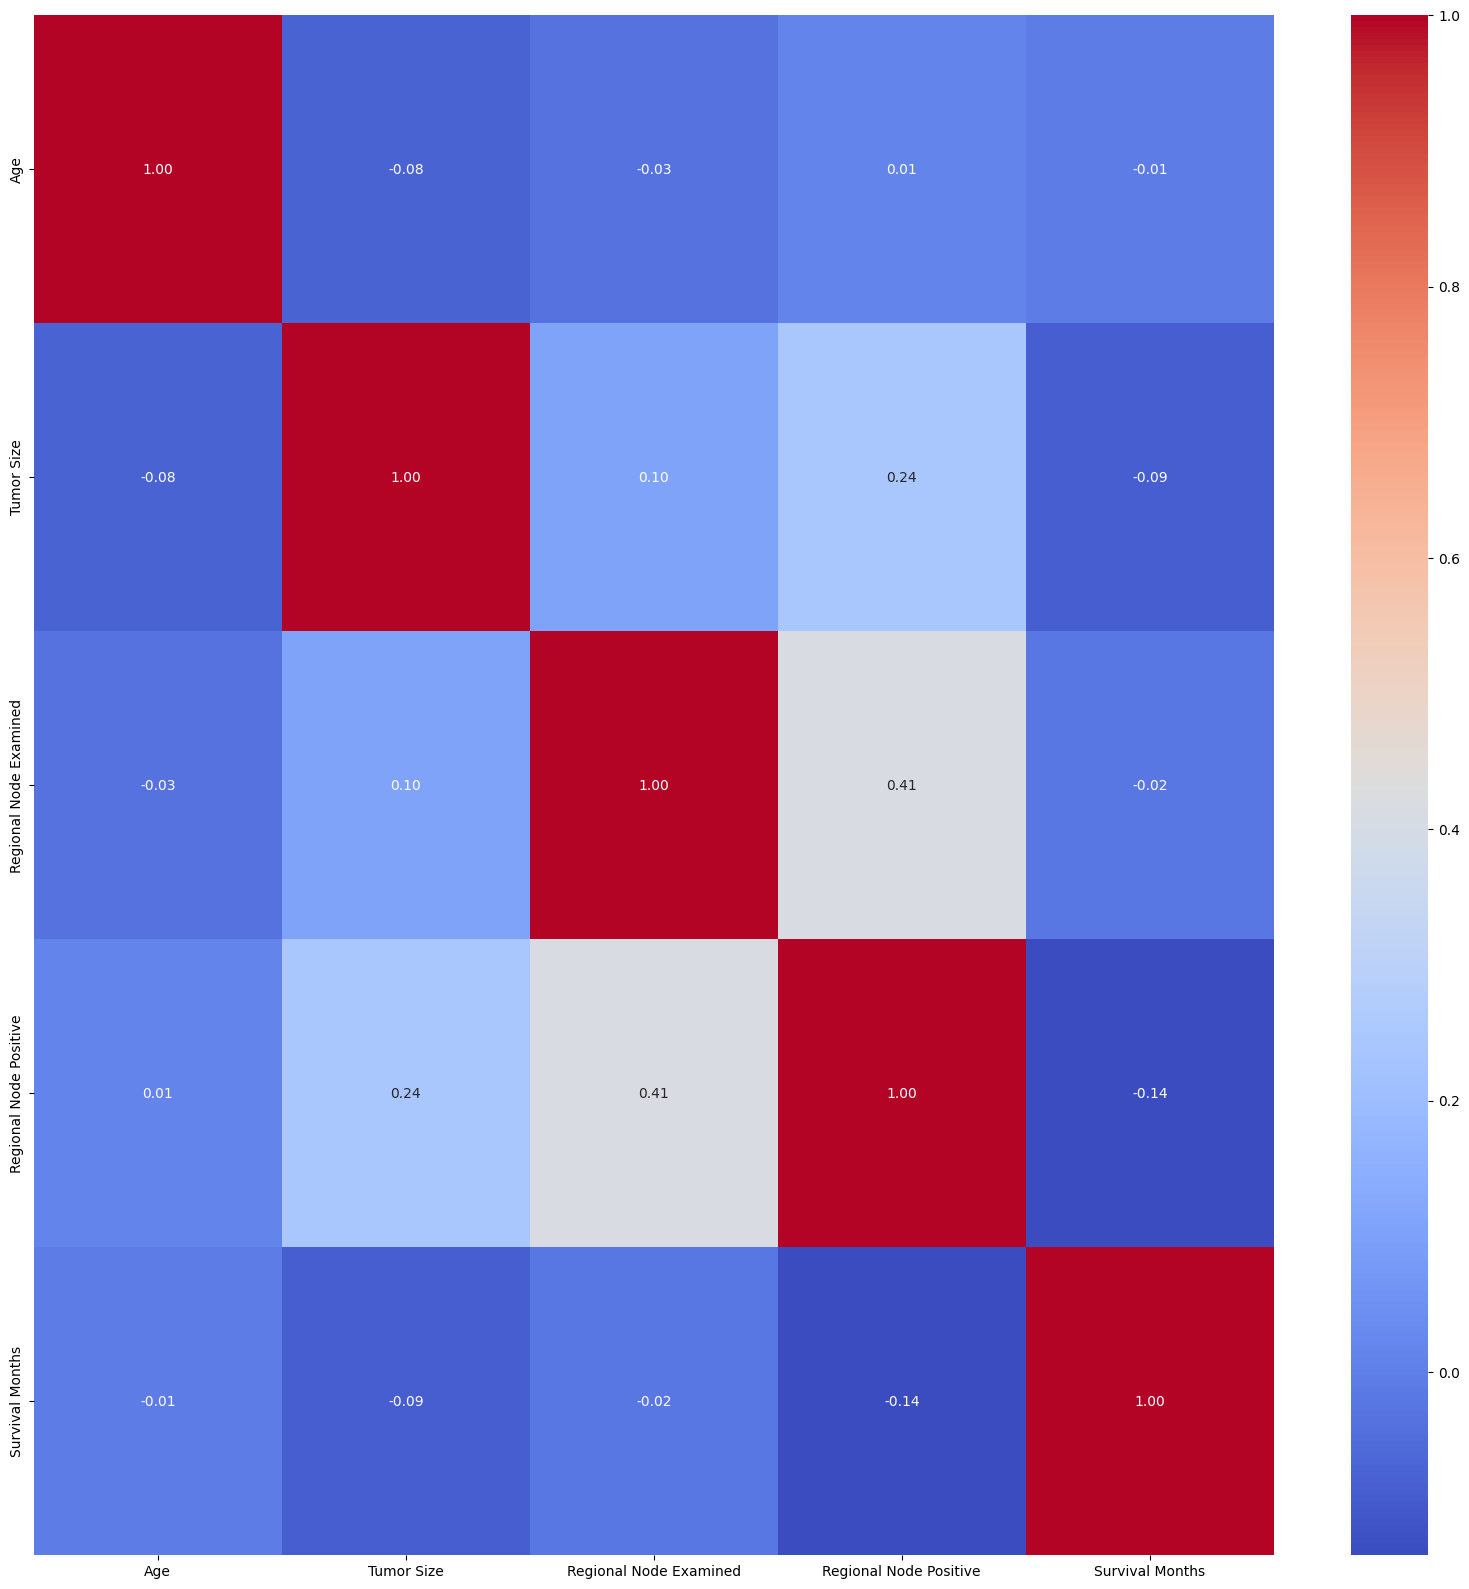

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.savefig('Correlation_Matrix.png')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ip

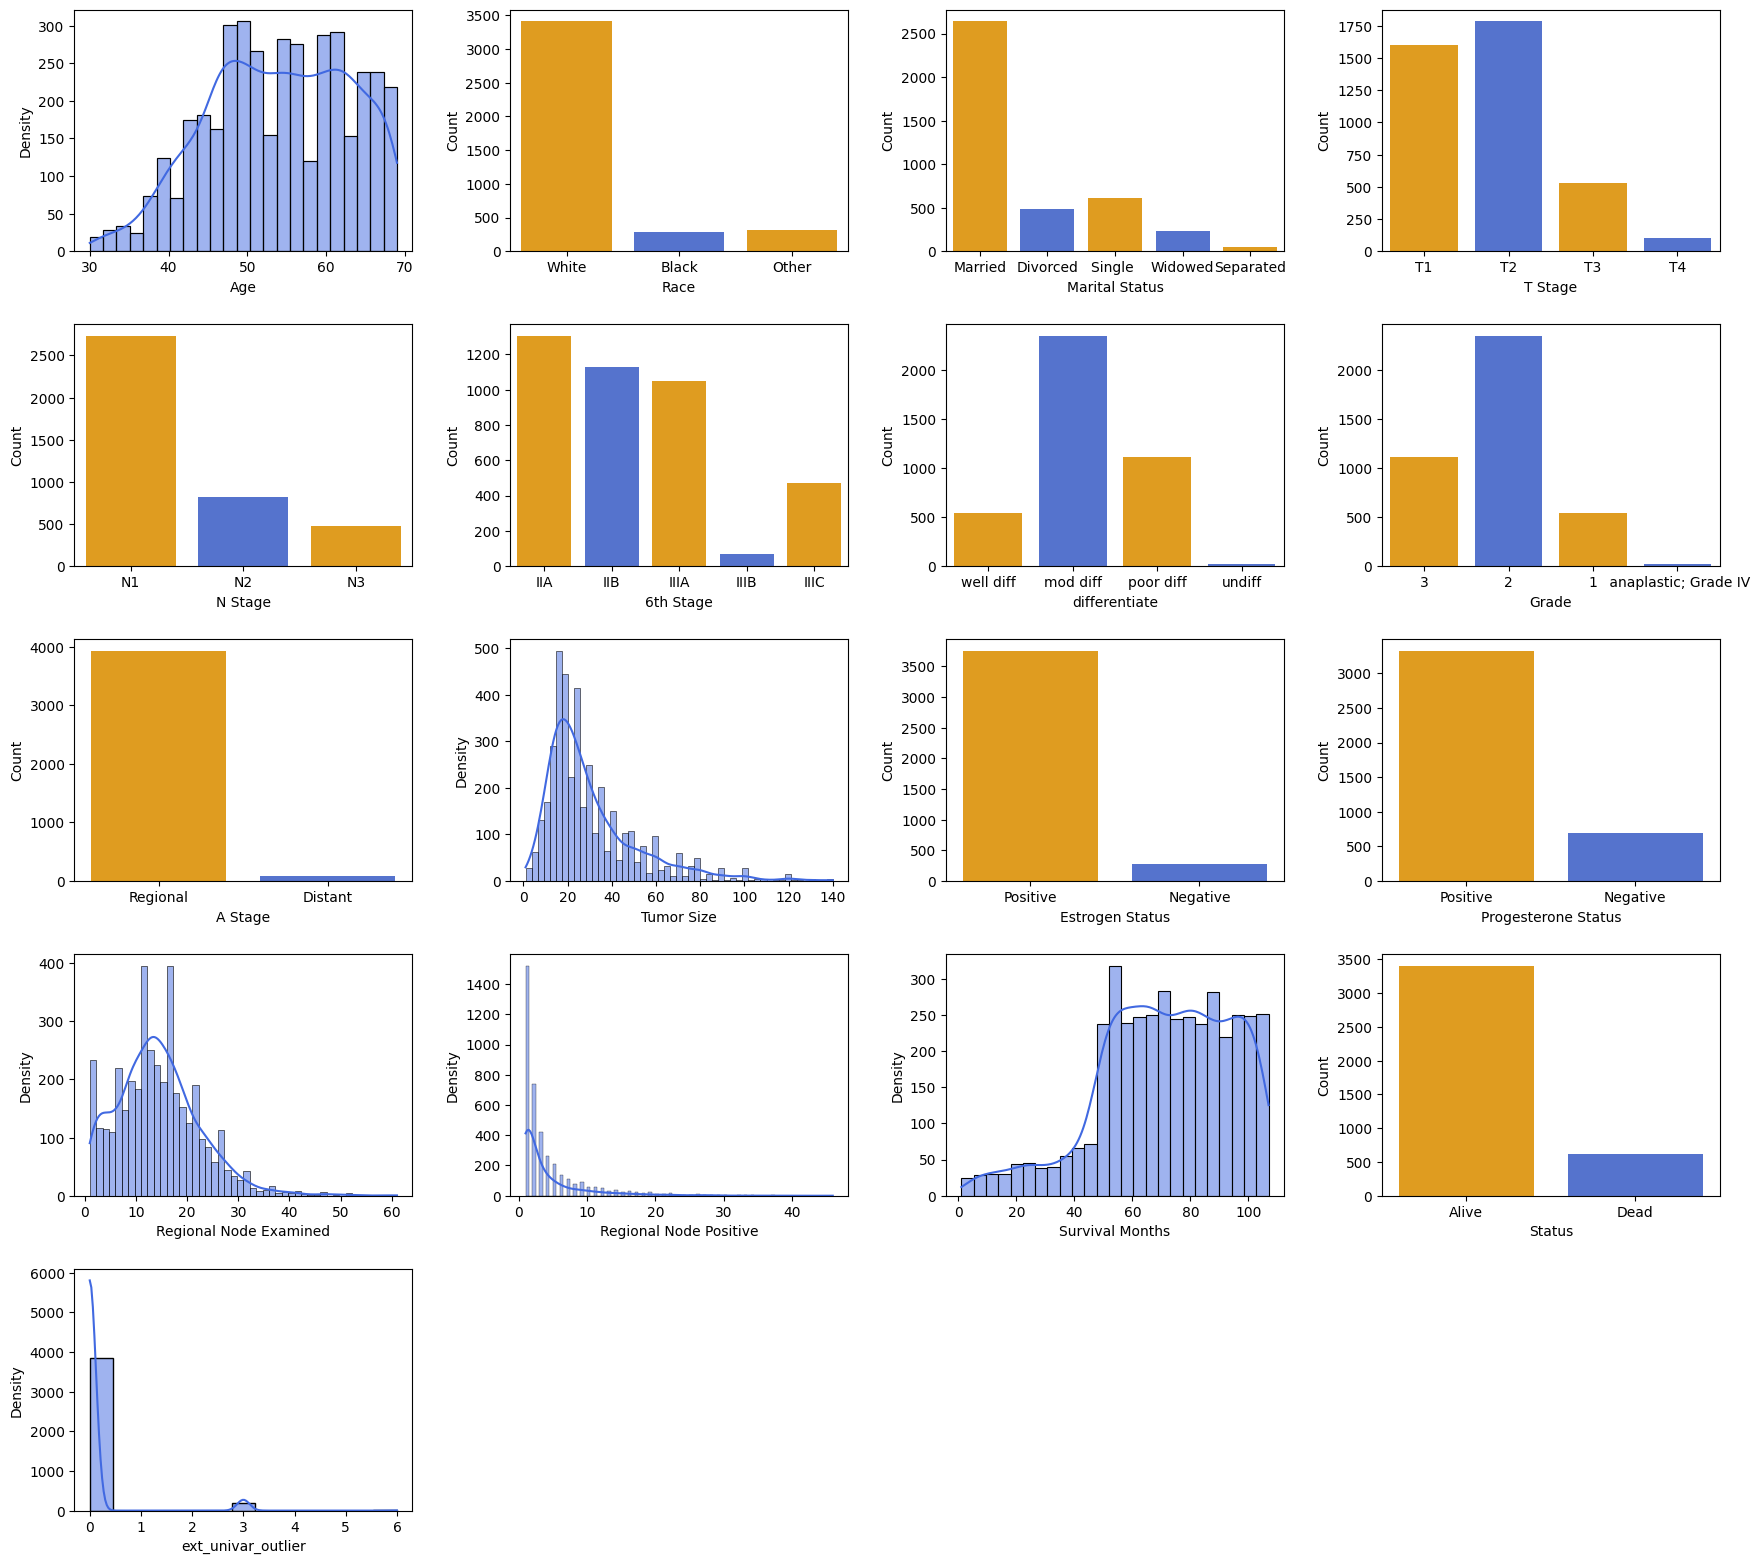

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def univariate_plot_dataframe(df, x=4, y=4):
    # Extract numerical and categorical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include='object').columns
    
    # Define custom color palette
    colors = ['#FFA500', '#4169E1']  # Orange and Blue
    
    # Calculate total number of plots
    total_plots = len(num_cols) + len(cat_cols)
    
    # Calculate the number of rows and columns needed
    rows = int(np.ceil(total_plots / x))
    cols = min(total_plots, x)
    
    # Create figure and axes
    fig, axes = plt.subplots(rows, cols, figsize=(18, 16))

    # Plot each variable
    plot_index = 0
    for col in df.columns:
        if col in cat_cols:
            # Plot categorical variables
            if col == 'differentiate':
                # change the names
                df[col] = df[col].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                           "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
                # plot the graph following the order
                sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], order=['well diff', 'mod diff', 'poor diff', 'undiff'], palette=colors)
            elif col == '6th Stage':
                sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], order=['IIA','IIB','IIIA','IIIB','IIIC'], palette=colors)
            else:
                sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
            axes[plot_index // x, plot_index % x].set_xlabel(col)
            axes[plot_index // x, plot_index % x].set_ylabel('Count')
        elif col in num_cols:
            # Plot numerical variables
            sns.histplot(df[col], kde=True, color=colors[1], ax=axes[plot_index // x, plot_index % x])
            axes[plot_index // x, plot_index % x].set_xlabel(col)
            axes[plot_index // x, plot_index % x].set_ylabel('Density')
        plot_index += 1
    
    # Hide extra subplots if not needed
    for i in range(plot_index, rows * cols):
        axes[i // x, i % x].axis('off')
    
    # Adjust spacing between subplots
    plt.tight_layout(pad=2.0)

    # Display the plot without the messages
    plt.show()

# Assuming 'df' is your DataFrame
univariate_plot_dataframe(df)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ip

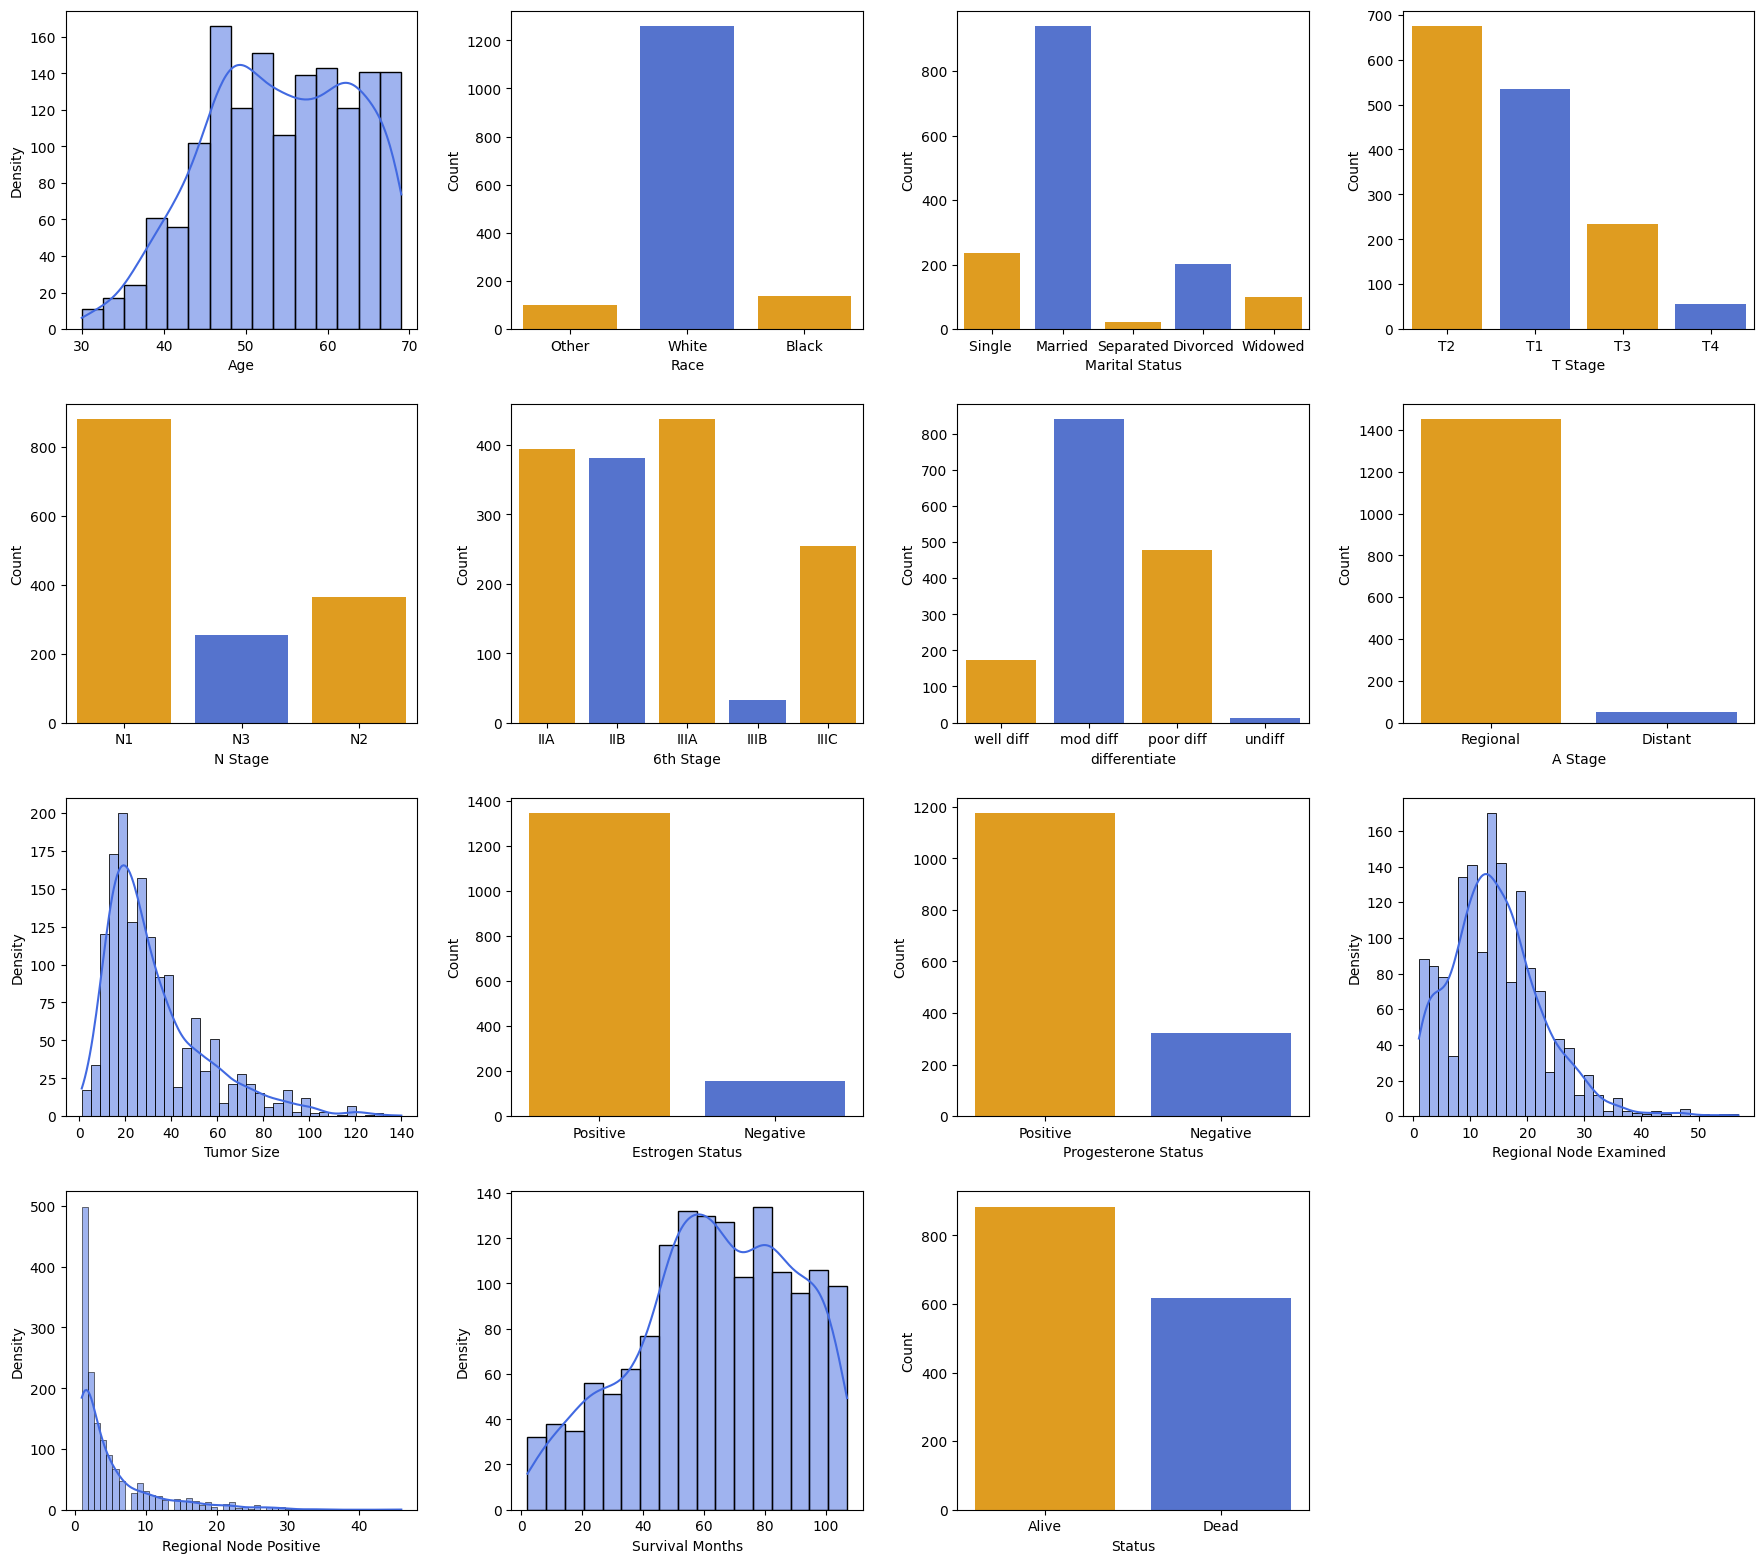

In [ ]:
univariate_plot_dataframe(df_p)


In [28]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Function to split categorical and numerical columns
def split_cat_num_columns(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    return cat_cols, num_cols

# Load your dataset
breast_cancer = pd.read_csv("Breast_Cancer.csv")

# Clean column names as per your earlier code
breast_cancer.columns = [c.lower().strip().replace(' ','_').replace('/','_').replace('-','_') for c in breast_cancer.columns]

# Split the columns into categorical and numerical
cat_cols, num_cols = split_cat_num_columns(breast_cancer)

# Check the normality of numerical columns using the Shapiro-Wilk test
shapiro_results = []
for column in num_cols:
    stat, p_value = shapiro(breast_cancer[column])
    shapiro_results.append((column, stat, p_value))

# Create a DataFrame to display the results
shapiro_df = pd.DataFrame(shapiro_results, columns=['Variable', 'Statistic', 'P_Value'])

# Interpretation
shapiro_df['Normality'] = shapiro_df['P_Value'].apply(lambda p: 'Reject H0 (Not Normal)' if p < 0.05 else 'Fail to Reject H0 (Normal)')
print(shapiro_df)


                 Variable  Statistic       P_Value               Normality
0                     age   0.975856  1.393733e-25  Reject H0 (Not Normal)
1              tumor_size   0.841386  4.181089e-53  Reject H0 (Not Normal)
2  regional_node_examined   0.959944  5.797632e-32  Reject H0 (Not Normal)
3  regional_node_positive   0.653169  1.328220e-67  Reject H0 (Not Normal)
4         survival_months   0.962397  3.989289e-31  Reject H0 (Not Normal)


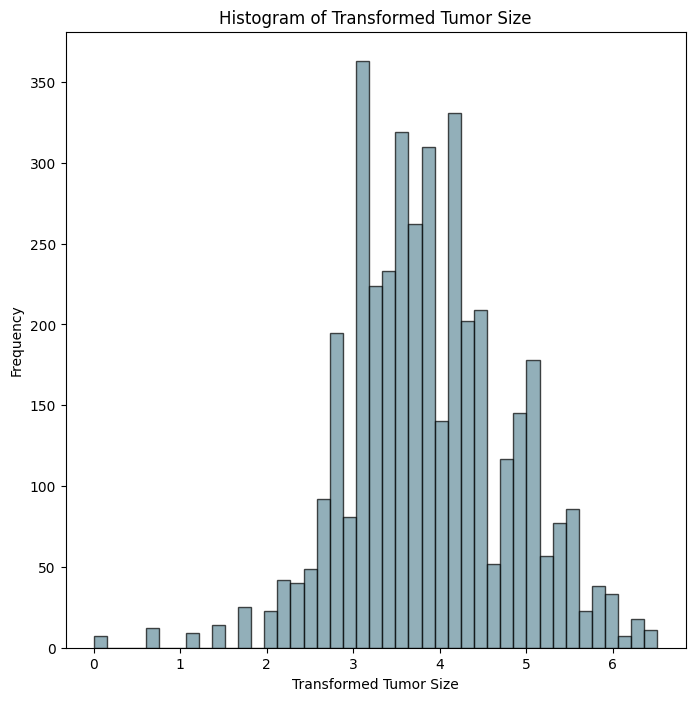

In [29]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Apply Box-Cox transformation to 'tumor_size'
transformed_tumor_size, lambda_ = boxcox(breast_cancer['tumor_size'])

# Create a new figure with the desired size
plt.figure(figsize=(8, 8))

# Plot the histogram of transformed 'tumor_size'
plt.hist(transformed_tumor_size, bins='auto', color='#648E9C', alpha=0.7, edgecolor='black')
plt.xlabel('Transformed Tumor Size')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed Tumor Size')
plt.show()


## Univariate Outlier analysis

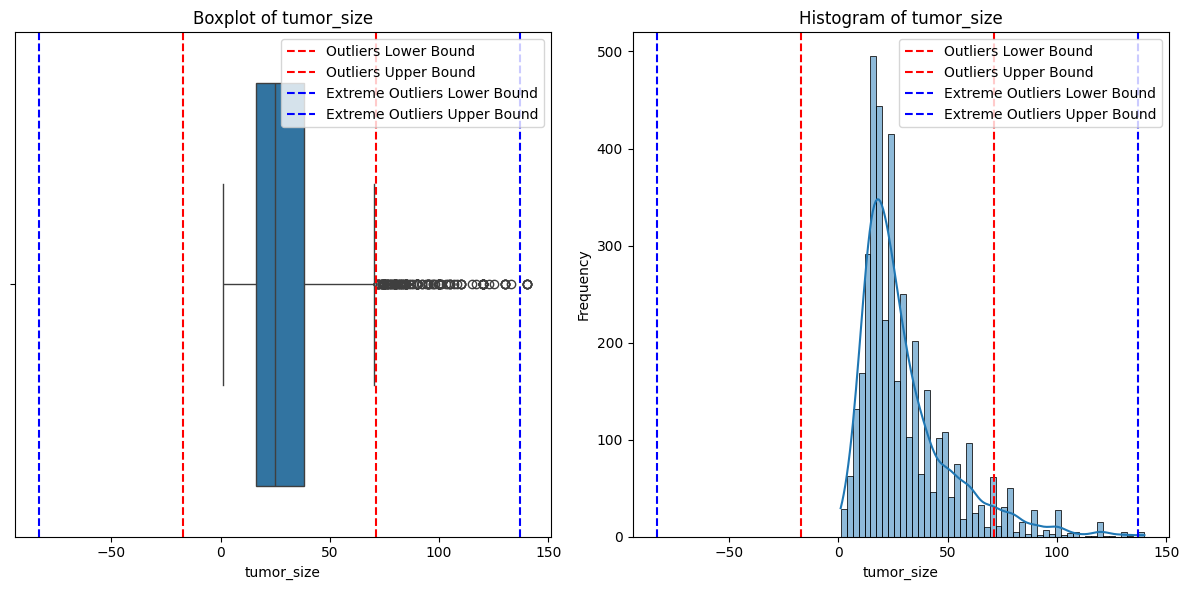

Outlier Analysis for 'tumor_size' Column:
Q1 (25th percentile): 16.00
Q3 (75th percentile): 38.00
Interquartile Range (IQR): 22.00
Lower Bound for Outliers: -17.00
Upper Bound for Outliers: 71.00
Lower Bound for Extreme Outliers: -83.00
Upper Bound for Extreme Outliers: 137.00
Number of Outliers: 222
Number of Extreme Outliers: 5

Outliers:
8       103
52      120
53       77
63       75
70      130
       ... 
3930    120
3965    140
3991     90
4009    100
4012     80
Name: tumor_size, Length: 222, dtype: int64

Extreme Outliers:
289     140
740     140
1007    140
1512    140
3965    140
Name: tumor_size, dtype: int64
      age   race marital_status t_stage n_stage 6th_stage  \
289    41  White        Married      T3      N3      IIIC   
740    49  White        Married      T3      N1      IIIA   
1007   60  White       Divorced      T3      N2      IIIA   
1512   63  White        Married      T4      N2      IIIB   
3965   47  White        Married      T3      N2      IIIA   

    

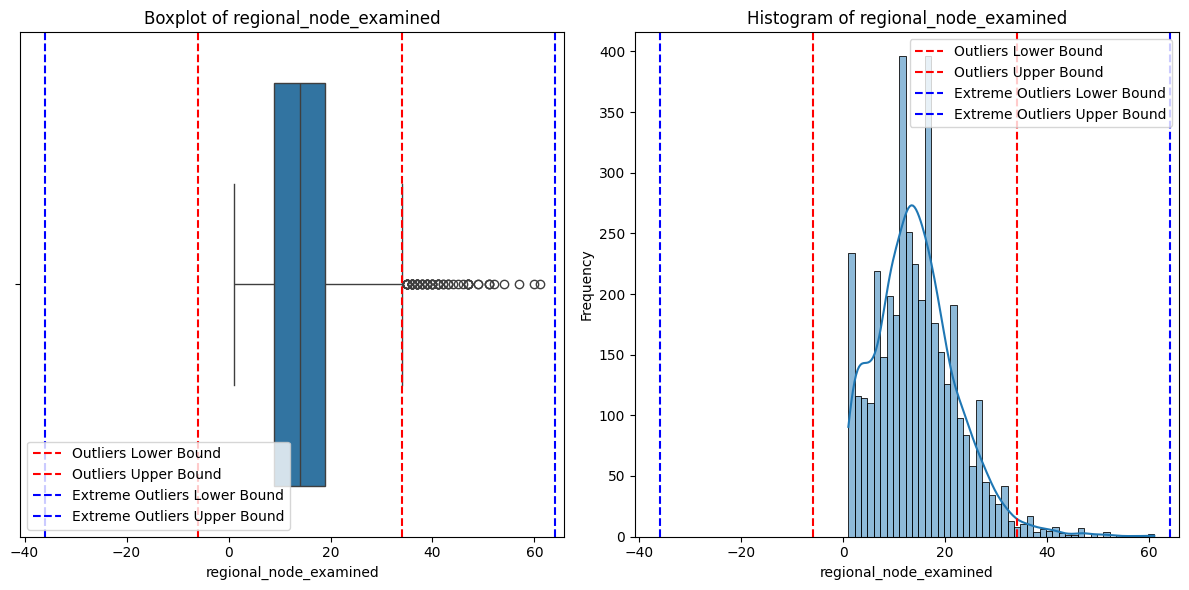

Outlier Analysis for 'regional_node_examined' Column:
Q1 (25th percentile): 9.00
Q3 (75th percentile): 19.00
Interquartile Range (IQR): 10.00
Lower Bound for Outliers: -6.00
Upper Bound for Outliers: 34.00
Lower Bound for Extreme Outliers: -36.00
Upper Bound for Extreme Outliers: 64.00
Number of Outliers: 72
Number of Extreme Outliers: 0

Outliers:
57      49
227     42
289     41
290     39
303     46
        ..
3893    40
3923    36
3950    60
3957    37
3990    39
Name: regional_node_examined, Length: 72, dtype: int64

Extreme Outliers:
Series([], Name: regional_node_examined, dtype: int64)
Empty DataFrame
Columns: [age, race, marital_status, t_stage, n_stage, 6th_stage, differentiate, grade, a_stage, tumor_size, estrogen_status, progesterone_status, regional_node_examined, regional_node_positive, survival_months, status]
Index: []

--------------------------------------------------



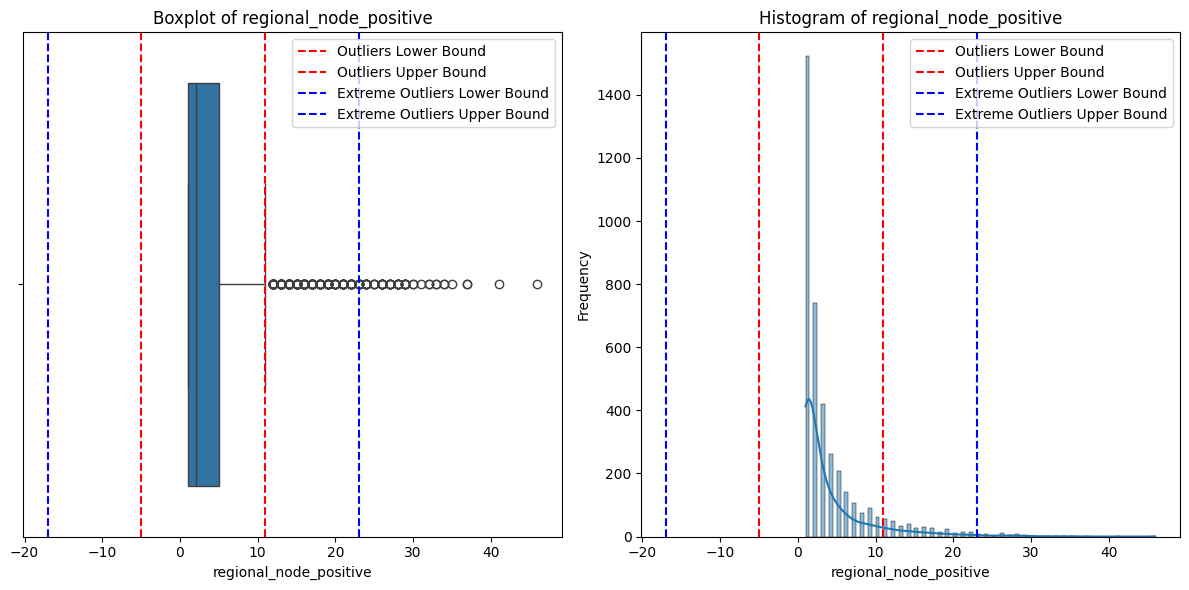

Outlier Analysis for 'regional_node_positive' Column:
Q1 (25th percentile): 1.00
Q3 (75th percentile): 5.00
Interquartile Range (IQR): 4.00
Lower Bound for Outliers: -5.00
Upper Bound for Outliers: 11.00
Lower Bound for Extreme Outliers: -17.00
Upper Bound for Extreme Outliers: 23.00
Number of Outliers: 344
Number of Extreme Outliers: 54

Outliers:
8       18
9       12
14      14
24      22
25      17
        ..
3974    13
3985    19
3992    19
3995    14
4012    12
Name: regional_node_positive, Length: 344, dtype: int64

Extreme Outliers:
100     24
219     27
238     26
288     28
482     24
522     28
530     28
535     24
544     29
550     31
574     26
633     46
662     27
838     33
909     29
922     27
989     37
1039    28
1116    24
1120    30
1128    37
1199    27
1246    26
1267    35
1382    25
1411    24
1567    29
1667    29
1711    25
1872    26
2028    29
2031    27
2142    32
2182    41
2287    26
2293    28
2425    28
2568    26
2638    28
2755    26
2928    30
29

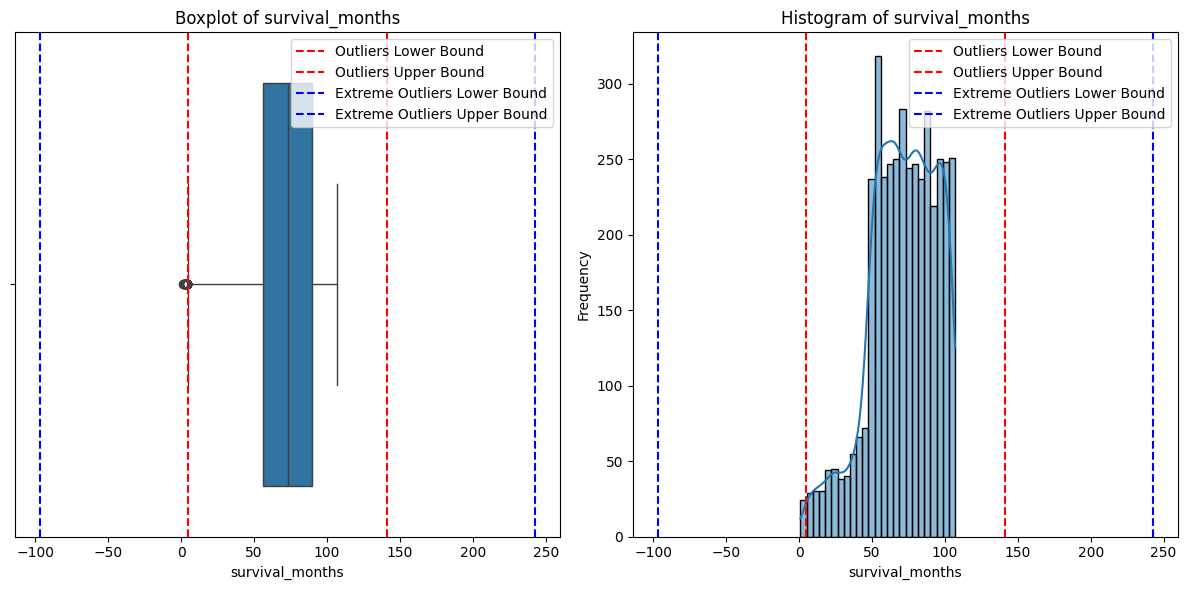

Outlier Analysis for 'survival_months' Column:
Q1 (25th percentile): 56.00
Q3 (75th percentile): 90.00
Interquartile Range (IQR): 34.00
Lower Bound for Outliers: 5.00
Upper Bound for Outliers: 141.00
Lower Bound for Extreme Outliers: -97.00
Upper Bound for Extreme Outliers: 243.00
Number of Outliers: 18
Number of Extreme Outliers: 0

Outliers:
414     3
679     4
721     3
896     4
921     1
928     3
1042    4
1156    2
1702    4
1709    3
1731    4
1751    2
1893    4
2230    2
2410    4
3089    4
3474    4
3803    4
Name: survival_months, dtype: int64

Extreme Outliers:
Series([], Name: survival_months, dtype: int64)
Empty DataFrame
Columns: [age, race, marital_status, t_stage, n_stage, 6th_stage, differentiate, grade, a_stage, tumor_size, estrogen_status, progesterone_status, regional_node_examined, regional_node_positive, survival_months, status]
Index: []

--------------------------------------------------



In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_boxplot_histogram(data, column, outliers_bounds=None, extreme_outliers_bounds=None):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot boxplot
    sns.boxplot(x=data[column], ax=axes[0])
    if outliers_bounds is not None:
        axes[0].axvline(x=outliers_bounds[0], color='red', linestyle='--', label='Outliers Lower Bound')
        axes[0].axvline(x=outliers_bounds[1], color='red', linestyle='--', label='Outliers Upper Bound')
    if extreme_outliers_bounds is not None:
        axes[0].axvline(x=extreme_outliers_bounds[0], color='blue', linestyle='--', label='Extreme Outliers Lower Bound')
        axes[0].axvline(x=extreme_outliers_bounds[1], color='blue', linestyle='--', label='Extreme Outliers Upper Bound')
    axes[0].set_title('Boxplot of {}'.format(column))
    axes[0].legend()
    
    # Plot histogram
    sns.histplot(data[column], bins='auto', kde=True, ax=axes[1])
    if outliers_bounds is not None:
        axes[1].axvline(x=outliers_bounds[0], color='red', linestyle='--', label='Outliers Lower Bound')
        axes[1].axvline(x=outliers_bounds[1], color='red', linestyle='--', label='Outliers Upper Bound')
    if extreme_outliers_bounds is not None:
        axes[1].axvline(x=extreme_outliers_bounds[0], color='blue', linestyle='--', label='Extreme Outliers Lower Bound')
        axes[1].axvline(x=extreme_outliers_bounds[1], color='blue', linestyle='--', label='Extreme Outliers Upper Bound')
    axes[1].set_title('Histogram of {}'.format(column))
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

def calculate_outliers(data, column):
    # Calculate quartiles and IQR
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define thresholds for detecting outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Find outliers and extreme outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    extreme_outliers = data[(data[column] < lower_bound - 3 * iqr) | (data[column] > upper_bound + 3 * iqr)][column]
    
    outliers_bounds = (lower_bound, upper_bound)
    extreme_outliers_bounds = (lower_bound - 3 * iqr, upper_bound + 3 * iqr)
    
    return q1, q3, iqr, outliers_bounds, extreme_outliers_bounds, outliers, extreme_outliers

def print_outlier_analysis(column, q1, q3, iqr, outliers_bounds, extreme_outliers_bounds, outliers, extreme_outliers):
    print("Outlier Analysis for '{}' Column:".format(column))
    print("Q1 (25th percentile): {:.2f}".format(q1))
    print("Q3 (75th percentile): {:.2f}".format(q3))
    print("Interquartile Range (IQR): {:.2f}".format(iqr))
    print("Lower Bound for Outliers: {:.2f}".format(outliers_bounds[0]))
    print("Upper Bound for Outliers: {:.2f}".format(outliers_bounds[1]))
    print("Lower Bound for Extreme Outliers: {:.2f}".format(extreme_outliers_bounds[0]))
    print("Upper Bound for Extreme Outliers: {:.2f}".format(extreme_outliers_bounds[1]))
    print("Number of Outliers: {}".format(len(outliers)))
    print("Number of Extreme Outliers: {}".format(len(extreme_outliers)))
    print("\nOutliers:")
    print(outliers)
    print("\nExtreme Outliers:")
    print(extreme_outliers)

# Example usage for multiple columns
columns_to_analyze = ['tumor_size', 'regional_node_examined', 'regional_node_positive', 'survival_months']
results = {}

for column in columns_to_analyze:
    q1, q3, iqr, outliers_bounds, extreme_outliers_bounds, outliers, extreme_outliers = calculate_outliers(breast_cancer, column)
    results[column] = {
        'q1': q1,
        'q3': q3,
        'iqr': iqr,
        'outliers_bounds': outliers_bounds,
        'extreme_outliers_bounds': extreme_outliers_bounds,
        'outliers': outliers,
        'extreme_outliers': extreme_outliers
    }
    plot_boxplot_histogram(breast_cancer, column, outliers_bounds, extreme_outliers_bounds)
    print_outlier_analysis(column, q1, q3, iqr, outliers_bounds, extreme_outliers_bounds, outliers, extreme_outliers)
    print(breast_cancer.loc[extreme_outliers.index])
    print("\n" + "-"*50 + "\n")


In [33]:
# Calculate outliers for the 'tumor_size' column
q1_tumor_size, q3_tumor_size, iqr_tumor_size, outliers_bounds_tumor_size, extreme_outliers_bounds_tumor_size, outliers_tumor_size, extreme_outliers_tumor_size = calculate_outliers(breast_cancer, 'tumor_size')

# Remove extreme outliers from the 'tumor_size' column
breast_cancer= breast_cancer[~breast_cancer['tumor_size'].isin(extreme_outliers_tumor_size)]

# Display information about removed extreme outliers
print("Extreme Outliers Removed from 'tumor_size' Column:")
print("Number of Extreme Outliers Removed:", len(extreme_outliers_tumor_size))




Extreme Outliers Removed from 'tumor_size' Column:
Number of Extreme Outliers Removed: 0


In [34]:
breast_cancer.shape

(4019, 16)

### Bivariate Analysis

In [59]:
import pandas as pd
from scipy.stats import chi2_contingency

def perform_chi_squared_test(data, categorical_columns):
    results = []
    
    # Perform chi-square test for each pair of categorical variables
    for i in range(len(categorical_columns)):
        for j in range(i+1, len(categorical_columns)):
            # Create contingency table for the pair of categorical variables
            contingency_table = pd.crosstab(data[categorical_columns[i]], data[categorical_columns[j]])
            
            # Perform chi-square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Append results to the list
            results.append({
                'Variable_1': categorical_columns[i],
                'Variable_2': categorical_columns[j],
                'Chi2_Statistic': chi2,
                'p-value': p,
            })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# List of categorical variables
cat_cols = ['race', 'marital_status', 't_stage', 'n_stage', '6th_stage', 'differentiate', 'a_stage', 'estrogen_status', 'progesterone_status', 'status']

# Perform chi-square test
chi_squared_results = perform_chi_squared_test(breast_cancer, cat_cols)

# Print results
print(chi_squared_results)





             Variable_1           Variable_2  Chi2_Statistic        p-value
0                  race       marital_status      137.649912   7.308896e-26
1                  race              t_stage        8.309501   2.162940e-01
2                  race              n_stage        6.215014   1.836560e-01
3                  race            6th_stage        8.923983   3.487492e-01
4                  race        differentiate       27.855377   1.000418e-04
5                  race              a_stage        0.303560   8.591773e-01
6                  race      estrogen_status       13.335971   1.270957e-03
7                  race  progesterone_status        4.982396   8.281072e-02
8                  race               status       27.992525   8.346424e-07
9        marital_status              t_stage       17.496399   1.318590e-01
10       marital_status              n_stage       22.713668   3.751987e-03
11       marital_status            6th_stage       28.533825   2.727577e-02
12       mar

In [36]:
def filter_results_by_p_value(results_df, threshold=0.05):

    return results_df[results_df['p-value'] > threshold]

# Filter chi-square test results based on p-value threshold
filtered_results = filter_results_by_p_value(chi_squared_results)

# Print filtered results
print("Results with p-value > 0.05:")
print(filtered_results)


Results with p-value > 0.05:
        Variable_1           Variable_2  Chi2_Statistic   p-value
1             race              t_stage        8.309501  0.216294
2             race              n_stage        6.215014  0.183656
3             race            6th_stage        8.923983  0.348749
5             race              a_stage        0.303560  0.859177
7             race  progesterone_status        4.982396  0.082811
9   marital_status              t_stage       17.496399  0.131859
12  marital_status        differentiate       19.112768  0.085843
13  marital_status              a_stage        7.649645  0.105289
14  marital_status      estrogen_status        7.647599  0.105374
40         a_stage  progesterone_status        2.363510  0.124202


In [37]:
# Filtrar resultados con p < 0.01
filtered_results = chi_squared_results[(chi_squared_results['p-value'] < 0.01)]

# Ordenar resultados por valor chi-cuadrado de mayor a menor
filtered_results = filtered_results.sort_values(by='Chi2_Statistic', ascending=False)

top_10_results = filtered_results.head(10)

# Imprimir los resultados filtrados
print("Results with p-value < 0.01 and sorted by Chi2_Statistic (from highest to lowest):")
print(top_10_results)


Results with p-value < 0.01 and sorted by Chi2_Statistic (from highest to lowest):
         Variable_1           Variable_2  Chi2_Statistic        p-value
18          t_stage            6th_stage     6758.500577   0.000000e+00
24          n_stage            6th_stage     6680.736947   0.000000e+00
42  estrogen_status  progesterone_status     1053.273598  4.729360e-231
31        6th_stage              a_stage      734.944227  9.446988e-158
20          t_stage              a_stage      588.843504  2.642004e-127
26          n_stage              a_stage      355.992419   4.979990e-78
17          t_stage              n_stage      321.169353   2.369998e-66
34        6th_stage               status      279.828664   2.426235e-59
29          n_stage               status      267.710959   7.367222e-59
36    differentiate      estrogen_status      217.262787   7.841574e-47


Multivariate Outliers Analysis

--- Number of Outliers ----
177


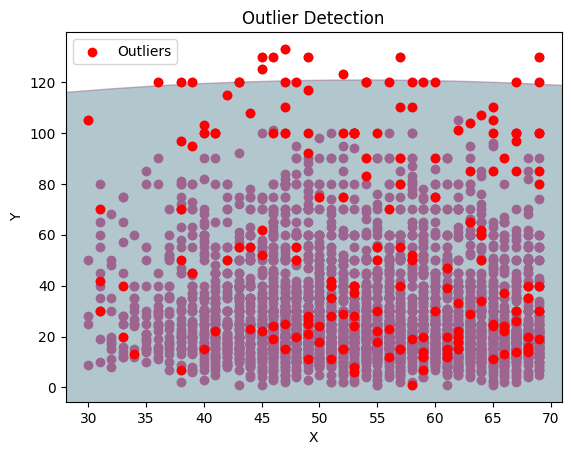

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import chi2

# Define your variables
df_mahalanobis = breast_cancer[num_cols]
df_mahalanobis = df_mahalanobis.to_numpy()

# Covariance matrix
cov_matrix = np.cov(df_mahalanobis, rowvar=False)
cov_matrix_pm1 = np.linalg.matrix_power(cov_matrix, -1)
centerpoint = np.mean(df_mahalanobis, axis=0)

# Distances between center point
distances = []
for val in df_mahalanobis:
    p1 = val
    p2 = centerpoint
    distance = (p1 - p2).T.dot(cov_matrix_pm1).dot(p1 - p2)
    distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers
cutoff = chi2.ppf(0.99, df_mahalanobis.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff)

# Number of outliers
num_outliers = len(outlierIndexes[0])
print('--- Number of Outliers ----')
print(num_outliers)

# Extract outliers
df_multiv_outliers = df_mahalanobis[distances > cutoff, :]

# Finding ellipse dimensions
lambda_, v = np.linalg.eig(cov_matrix)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                          width=lambda_[0] * np.sqrt(cutoff) * 2, height=lambda_[1] * np.sqrt(cutoff) * 2,
                          angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#9C648E')
ellipse.set_facecolor('#648E9C')  # Set the facecolor to '#9C648E'
ellipse.set_alpha(0.5)

# Scatter plot
fig, ax = plt.subplots()
ax.add_artist(ellipse)
ax.scatter(df_mahalanobis[:, 0], df_mahalanobis[:, 1], color='#9C648E')  # Set the scatter plot color to '#648E9C'

# Highlight outliers
ax.scatter(df_multiv_outliers[:, 0], df_multiv_outliers[:, 1], color='red', label='Outliers')

# Set plot title and labels
ax.set_title('Outlier Detection')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

plt.show()


In [52]:
np.random.seed(666)
breast_cancer_new = breast_cancer.sample(frac=1).reset_index(drop=True)
breast_cancer_new.to_csv('breast_cancer_new.csv', index=False)

Feature selection

In [58]:
import pandas as pd
import numpy as np

breast_cancer = pd.read_csv('breast_cancer_new.csv')

# Define custom age ranges and corresponding labels
bins = [30, 50, 60, np.inf]
labels = ['Young', 'Middle-aged', 'Elderly']

# Create a new column 'Age Group' based on custom age ranges
breast_cancer['Age Group'] = pd.cut(breast_cancer['age'], bins=bins, labels=labels)

breast_cancer['Race Group'] = ''
# Assign the broader race group based on Race values
breast_cancer['Race Group'] = np.where(breast_cancer['race'] == 'White', 'Non-White', breast_cancer['Race Group'])
breast_cancer['Race Group'] = np.where(breast_cancer['race'].isin(['Other', 'Black']), 'Non-White', breast_cancer['Race Group'])

breast_cancer['Tumor Stage Group'] = ''
# Assign the Tumor Stage Group based on T Stage values
breast_cancer['Tumor Stage Group'] = np.where(breast_cancer['t_stage']=='T1', 'Early Stage', breast_cancer['Tumor Stage Group'])
breast_cancer['Tumor Stage Group'] = np.where(breast_cancer['t_stage'].isin(['T2', 'T3', 'T4']), 'Advanced Stage', breast_cancer['Tumor Stage Group'])

breast_cancer['Marital Status Group'] = ''
# Assign the Marital Status Group based on Marital Status values
breast_cancer['Marital Status Group'] = np.where(breast_cancer['marital_status']=='Married', 'Married', breast_cancer['Marital Status Group'])
breast_cancer['Marital Status Group'] = np.where(breast_cancer['marital_status'].isin(['Divorced', 'Single', 'Widowed', 'Separated']), 'Non-Married', breast_cancer['Marital Status Group'])

# Calculate Age at Diagnosis
breast_cancer['Age at Diagnosis'] = breast_cancer['age'] - (breast_cancer['survival_months'] // 12)

# Calculate Positive Lymph Ratio and round to 2 decimal places
breast_cancer['Positive Lymph Ratio'] = (breast_cancer['regional_node_positive'] / breast_cancer['regional_node_examined']).round(2)

# Save the modified DataFrame to a new CSV file
breast_cancer.to_csv('proba1.csv', index=False)

